In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
# Twitter Api Credentials
consumerKey = 'MJ3DzrUvxlnkwta1IOgB7ddnv'
consumerSecret = '2mFF9XrV2QF12WgsSfteZO78ZJ0pD1aQvu7U89S2EnSbpSbxhn'
accessToken = '1358118143080730630-f824YAnQiUjSZsftXTNspoANjAJl8O'
accessTokenSecret = 'g5ZkuIRQpDIuxBb8n1HhpTRnmNfKkoQLtENSPr8EhU64J'


In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)


In [4]:
# Extract 100 tweets from the twitter user
#posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")

list_of_stocks = ['AACG', 'AACQ', 'AACQU', 'AACQW', 'AAL']
tweets_dict = {}
tweets_list = []

# Set up the dictionary for all stocks
for stock in list_of_stocks:   
  tweets_dict[stock] = []
  for tweet in tweepy.Cursor(api.search, q=stock, rpp=100).items(100):
    tweets_dict[stock].append(tweet.text)

# Set up array for just TSLA
for tweet in tweepy.Cursor(api.search, q='TSLA', rpp=100).items(100):
    tweets_list.append(tweet.text)

#tweets_dict
tweets_list

['RT @ICannot_Enough: Premium brands with U.S. sales &gt; 200,000 vehicles per year:\n\n2017: Mercedes, BMW, Lexus, Audi, Buick\n\n2018: Mercedes, B…',
 'Stocks to watch Feb. 8 thru Feb. 12 $GME $NFLX $SPY $QQQ $TSLA $NIO $SNOW $BAC $WFC $BRO $VIRT $SNDL $HITIF &amp;… https://t.co/c1wMDjxo2w',
 'RT @Dividend_Dollar: Over the next 5 years, what industry do you think will outperform most?\n\nEVs\n$TSLA\n$NIO\n$WKHS\n$CCIV\n\nCashless Pymt\n$V…',
 'RT @LLCDC1: I’m fully serious. \n\nI’ve heard normies saying “bro, Elon Musks coin $DOGE is going to be big, next TSLA, buy it”. \n\nWont end w…',
 'RT @TokenRev: I think I will dump all my #Crypto plus #TSLA to hold $doge #dogecoin . What do you say @elonmusk ?',
 'RT @BarbaraCormac: Just a reminder that $TSLA is still undervalued.',
 'I think I will dump all my #Crypto plus #TSLA to hold $doge #dogecoin . What do you say @elonmusk ?',
 'RT @LLCDC1: I’m fully serious. \n\nI’ve heard normies saying “bro, Elon Musks coin $DOGE is going to be big

In [5]:
# Create a dataframe with a column called Tweets
#df = pd.DataFrame(tweets_dict.items(), columns=['Stock','Tweets'])
df = pd.DataFrame(tweets_list, columns=['Tweets'])
# Show the first 5 rows of data
df.head()


,Tweets
0,RT @ICannot_Enough: Premium brands with U.S. s...
1,Stocks to watch Feb. 8 thru Feb. 12 $GME $NFLX...
2,"RT @Dividend_Dollar: Over the next 5 years, wh..."
3,RT @LLCDC1: I’m fully serious. \n\nI’ve heard ...
4,RT @TokenRev: I think I will dump all my #Cryp...


In [6]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df


,Tweets
0,_Enough: Premium brands with U.S. sales &gt; 2...
1,Stocks to watch Feb. 8 thru Feb. 12 $GME $NFLX...
2,"_Dollar: Over the next 5 years, what industry ..."
3,1: I’m fully serious. \n\nI’ve heard normies s...
4,: I think I will dump all my Crypto plus TSLA ...
...,...
95,I’m fully serious. \n\nI’ve heard normies sayi...
96,": $HTSC, EV Nickel battery play. $TSLA and $GM..."
97,1月記録\n新規買い: $ZI $ZM \n買い増し: $AMD\n売り: $ADBE $TSLA
98,": $HTSC, EV Nickel battery play. $TSLA and $GM..."


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df


,Tweets,Subjectivity,Polarity
0,_Enough: Premium brands with U.S. sales &gt; 2...,0.500000,0.000000
1,Stocks to watch Feb. 8 thru Feb. 12 $GME $NFLX...,0.000000,0.000000
2,"_Dollar: Over the next 5 years, what industry ...",0.250000,0.250000
3,1: I’m fully serious. \n\nI’ve heard normies s...,0.255556,-0.111111
4,: I think I will dump all my Crypto plus TSLA ...,0.000000,0.000000
...,...,...,...
95,I’m fully serious. \n\nI’ve heard normies sayi...,0.255556,-0.111111
96,": $HTSC, EV Nickel battery play. $TSLA and $GM...",0.000000,0.000000
97,1月記録\n新規買い: $ZI $ZM \n買い増し: $AMD\n売り: $ADBE $TSLA,0.000000,0.000000
98,": $HTSC, EV Nickel battery play. $TSLA and $GM...",0.000000,0.000000


In [8]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df


,Tweets,Subjectivity,Polarity,Analysis
0,_Enough: Premium brands with U.S. sales &gt; 2...,0.500000,0.000000,Neutral
1,Stocks to watch Feb. 8 thru Feb. 12 $GME $NFLX...,0.000000,0.000000,Neutral
2,"_Dollar: Over the next 5 years, what industry ...",0.250000,0.250000,Positive
3,1: I’m fully serious. \n\nI’ve heard normies s...,0.255556,-0.111111,Negative
4,: I think I will dump all my Crypto plus TSLA ...,0.000000,0.000000,Neutral
...,...,...,...,...
95,I’m fully serious. \n\nI’ve heard normies sayi...,0.255556,-0.111111,Negative
96,": $HTSC, EV Nickel battery play. $TSLA and $GM...",0.000000,0.000000,Neutral
97,1月記録\n新規買い: $ZI $ZM \n買い増し: $AMD\n売り: $ADBE $TSLA,0.000000,0.000000,Neutral
98,": $HTSC, EV Nickel battery play. $TSLA and $GM...",0.000000,0.000000,Neutral


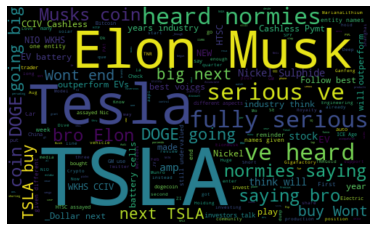

In [9]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [10]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1


Printing positive tweets:

1) _Dollar: Over the next 5 years, what industry do you think will outperform most?

EVs
$TSLA
$NIO
$WKHS
$CCIV

Cashless Pymt
$V…

2) : These are our top picks for 2021 $PACB, $CSTL, $NVTA $CRSP, $APPS, $MGNI, $ROKU, $TSLA, $PYPL, $SHOP, $SE $SQ, $SKLZ,…

3) _Dollar: Over the next 5 years, what industry do you think will outperform most?

EVs
$TSLA
$NIO
$WKHS
$CCIV

Cashless Pymt
$V…

4) _Dollar: Over the next 5 years, what industry do you think will outperform most?

EVs
$TSLA
$NIO
$WKHS
$CCIV

Cashless Pymt
$V…

5) : How many cars can you control with a phone? Not many, $NIO you can! Accumulate and go long we have only just begun.  $TSLA $A…

6) 230: Charts of interest after a quick review.

$TSM $PLUG $TSLA $ZI $NVCR $CRWD $ZS $HOLX $FLGT

7) _Dollar: Over the next 5 years, what industry do you think will outperform most?

EVs
$TSLA
$NIO
$WKHS
$CCIV

Cashless Pymt
$V…

8) : $HTSC, Huge EV Nickel Sulphide play. $TSLA and $GM EV battery cells are made 90% o

In [11]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1


Printing negative tweets:

1) 1: I’m fully serious. 

I’ve heard normies saying “bro, Elon Musks coin $DOGE is going to be big, next TSLA, buy it”. 

Wont end w…

2) 1: I’m fully serious. 

I’ve heard normies saying “bro, Elon Musks coin $DOGE is going to be big, next TSLA, buy it”. 

Wont end w…

3) : [PA1] First auto media to enter the second production line of Tesla Gigafactory Shanghai, Check out the China-Made Mo…

4) 1: I’m fully serious. 

I’ve heard normies saying “bro, Elon Musks coin $DOGE is going to be big, next TSLA, buy it”. 

Wont end w…

5) 1: I’m fully serious. 

I’ve heard normies saying “bro, Elon Musks coin $DOGE is going to be big, next TSLA, buy it”. 

Wont end w…

6) 1: I’m fully serious. 

I’ve heard normies saying “bro, Elon Musks coin $DOGE is going to be big, next TSLA, buy it”. 

Wont end w…

7) 1: I’m fully serious. 

I’ve heard normies saying “bro, Elon Musks coin $DOGE is going to be big, next TSLA, buy it”. 

Wont end w…

8) : [PA1] First auto media to e

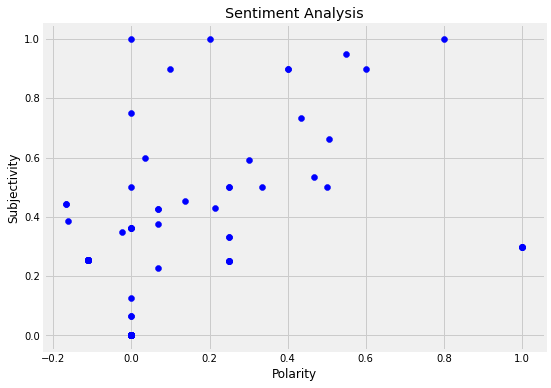

In [12]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()


In [13]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)


34.0

In [14]:

# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

19.0

In [15]:
# Show the value counts
df['Analysis'].value_counts()


Neutral     47
Positive    34
Negative    19
Name: Analysis, dtype: int64

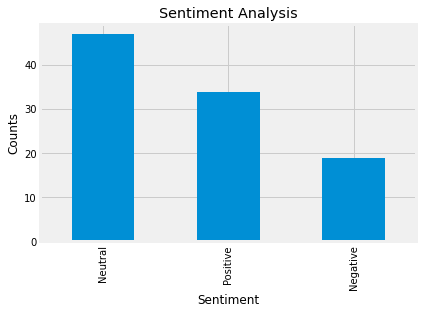

In [16]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
